In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.datasets import fetch_openml

In [2]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
mnist = fetch_openml('mnist_784',as_frame=False)
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47

In [5]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
X,y = mnist.data,mnist.target
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [8]:
28*28

784

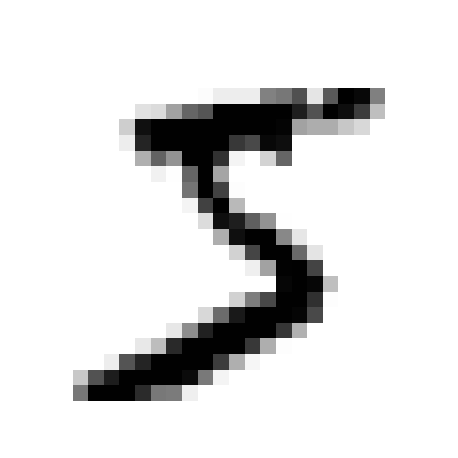

In [9]:
def plot_image(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image,cmap='binary')
    plt.axis('off')

some_digit = X[0]
plot_image(some_digit)
save_fig('some_digit_plot')
plt.show()

In [10]:
y[0]

'5'

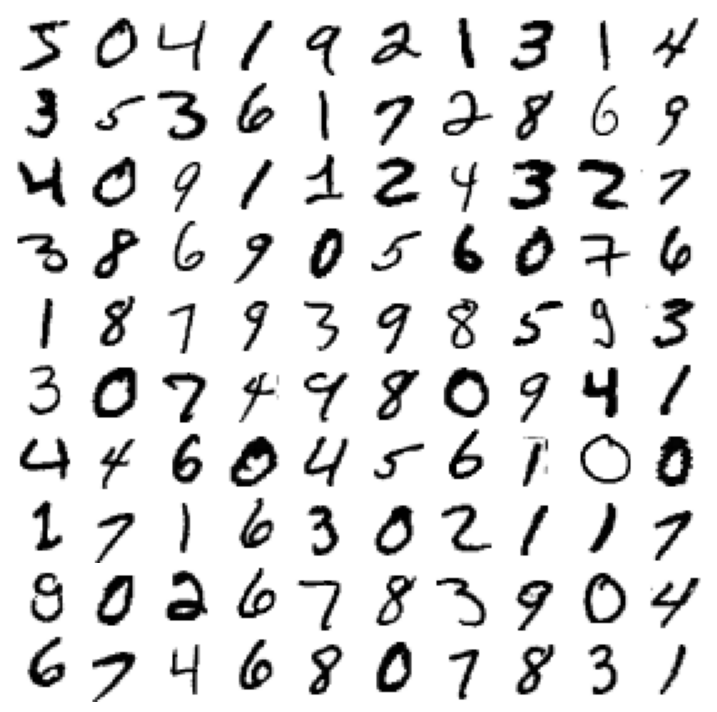

In [11]:
plt.figure(figsize=(9,9))
for idx,image_data in enumerate(X[:100]):
    plt.subplot(10,10,idx + 1)
    plot_image(image_data)

plt.subplots_adjust(wspace=0, hspace=0)
save_fig("more_digits_plot", tight_layout=False)
plt.show()

In [12]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [13]:
y_train_5 = y_train == '5'
y_test_5 = y_test == '5'
len(y_train_5),len(y_test_5)

(60000, 10000)

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [15]:
sgd_clf.predict([some_digit])

array([ True])

In [16]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [17]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.base import clone

# skfolds = StratifiedKFold(n_splits=3)

# for train_index,test_index in skfolds.split(X_train,y_train_5):
#     clone_clf = clone(sgd_clf)
#     X_train_folds = X_train[train_index]
#     y_train_folds = y_train_5[train_index]
#     X_test_fold = X_train[test_index]
#     y_test_fold = y_train_5[test_index]

#     clone_clf.fit(X_train_folds,y_train_folds)
#     y_pred = clone_clf.predict(X_test_fold)
#     n_correct = sum(y_pred == y_test_fold)


In [18]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [19]:
cross_val_score(dummy_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

In [20]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_train_5,y_pred=y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [22]:
# Assuming we have a perfect clf
confusion_matrix(y_train_5,y_train_5)

array([[54579,     0],
       [    0,  5421]])

In [23]:
from sklearn.metrics import precision_score,recall_score

precision_score(y_true = y_train_5,y_pred=y_train_pred)

0.8370879772350012

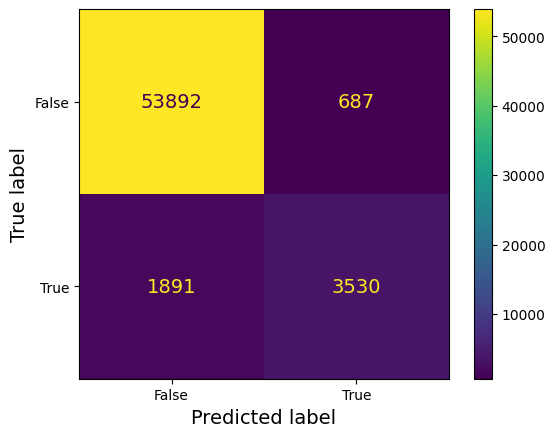

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=sgd_clf.classes_)
disp.plot()
plt.show()


In [25]:
precision = cm[1,1] / (cm[1,1] + cm[0,1])
print(precision)

0.8370879772350012


In [26]:
recall = cm[1,1] / (cm[1,1] + cm[1,0])
print(recall)

0.6511713705958311


In [27]:
from sklearn.metrics import recall_score
recall_score(y_true=y_train_5,y_pred=y_train_pred)

0.6511713705958311

In [28]:
from sklearn.metrics import f1_score

f1 = f1_score(y_true=y_train_5,y_pred=y_train_pred)
f1

0.7325171197343847

In [29]:
# decision_function computes the threshold for eacch class
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [30]:
y_scores > 0

array([ True])

In [31]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [32]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [33]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)


In [34]:
thresholds.shape,precisions.shape,recalls.shape

((60000,), (60001,), (60001,))

In [35]:
thresholds.min(),thresholds.max()

(-146348.56726173862, 49441.437659047755)

In [36]:
#  make sure to verify the shapes of recalls,precisions,thresholds before ploting

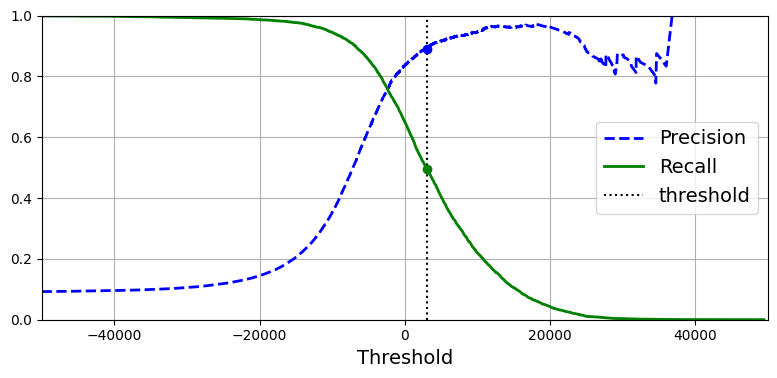

In [37]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
idx = (thresholds >= threshold).argmax()
plt.plot(thresholds[idx],precisions[idx],'bo')
plt.plot(thresholds[idx],recalls[idx],'go')
plt.axis([-50000, 50000, 0, 1])
plt.grid(True)
plt.xlabel('Threshold')
plt.legend(loc='center right')
save_fig("precision_recall_vs_threshold_plot")

plt.show()


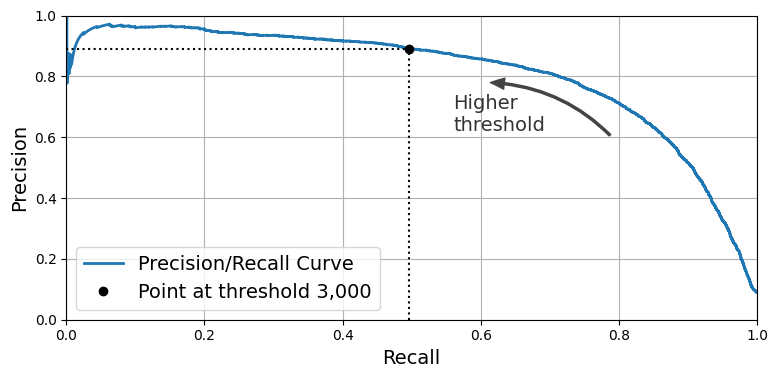

In [38]:
import matplotlib.patches as patches
plt.figure(figsize=(8,4))
# Plotting precision against recall

plt.plot(recalls,precisions,linewidth=2,label='Precision/Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='upper right')
plt.grid(True)

plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
# plt.grid()
plt.legend(loc="lower left")
save_fig("precision_vs_recall_plot")

plt.show()

In [39]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [40]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [41]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [42]:
recall_at_90_precision = recall_score(y_train_5,y_train_pred_90)
recall_at_90_precision

0.4799852425751706

In [43]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

520


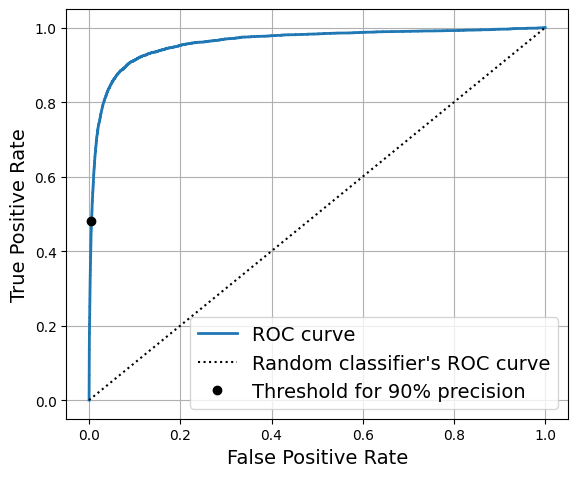

In [44]:
# Finding the point that corresponds to 90% precision
idx_for_thresholds_at_90 = (thresholds <= threshold_for_90_precision).argmax()
print(idx_for_thresholds_at_90)

tpr_90,fpr_90 = tpr[idx_for_thresholds_at_90],fpr[idx_for_thresholds_at_90]
tpr_90,fpr_90

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
save_fig("roc_curve_plot")
plt.show()



In [45]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [46]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=50,random_state=42,verbose=3,n_jobs=-1)

In [47]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")
y_probas_forest[:2]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 50building tree 2 of 50

building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    5.8s


building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 50building tree 2 of 50

building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    5.8s


building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.5s


building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished


array([[0.1 , 0.9 ],
       [0.98, 0.02]])

In [48]:
y_probas_forest.shape

(60000, 2)

In [49]:
y_probas_forest

array([[0.1 , 0.9 ],
       [0.98, 0.02],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.96, 0.04]])

In [50]:
idx_50_to_60 = (y_probas_forest[:, 1] > 0.50) & (y_probas_forest[:, 1] < 0.60)
print(f"{(y_train_5[idx_50_to_60]).sum() / idx_50_to_60.sum():.1%}")

92.2%


In [51]:
y_scores_forest = y_probas_forest[:,1]
precisions_forest,recalls_forest,thresholds_forest = precision_recall_curve(y_train_5,y_scores_forest)


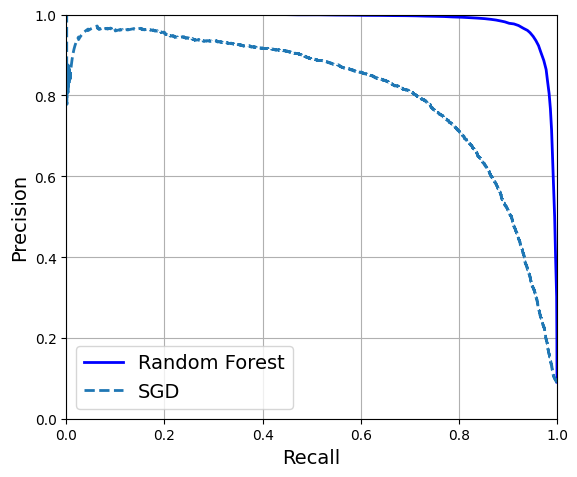

In [52]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("pr_curve_comparison_plot")

plt.show()

In [53]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba ≥ 50%
f1_score(y_train_5, y_train_pred_forest)

0.9276920070353722

In [54]:
roc_auc_score(y_train_5, y_scores_forest)

0.9978036724225767

In [55]:
precision_score(y_train_5, y_train_pred_forest)

0.9862871389985456

In [56]:
recall_score(y_train_5, y_train_pred_forest)

0.8756686958125807

# Multiclass Classification

In [57]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000],y_train[:2000])

SVC(random_state=42)

In [58]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [59]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [60]:
class_id = some_digit_scores.argmax()
class_id

5

In [61]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [62]:
svm_clf.classes_[class_id]

'5'

In [63]:
svm_clf.decision_function_shape = 'ovo'
some_digit_scores_ovo = svm_clf.decision_function([some_digit])
some_digit_scores_ovo.round(2)

array([[ 0.11, -0.21, -0.97,  0.51, -1.01,  0.19,  0.09, -0.31, -0.04,
        -0.45, -1.28,  0.25, -1.01, -0.13, -0.32, -0.9 , -0.36, -0.93,
         0.79, -1.  ,  0.45,  0.24, -0.24,  0.25,  1.54, -0.77,  1.11,
         1.13,  1.04,  1.2 , -1.42, -0.53, -0.45, -0.99, -0.95,  1.21,
         1.  ,  1.  ,  1.08, -0.02, -0.67, -0.14, -0.3 , -0.13,  0.25]])

In [64]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000],y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [65]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [66]:
len(ovr_clf.estimators_)

10

In [67]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [68]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [69]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy',n_jobs=-1)

array([0.87365, 0.85835, 0.8689 ])

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=2,scoring='accuracy',n_jobs=-1)

array([0.90676667, 0.90103333])

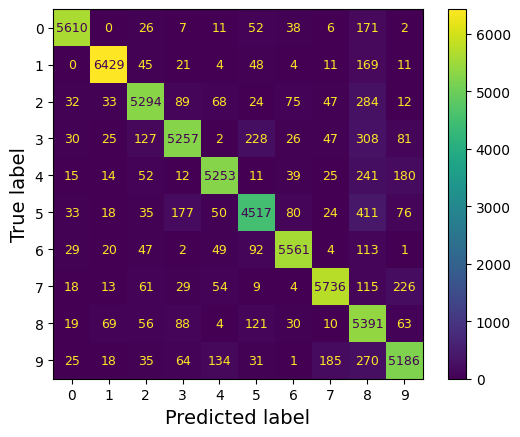

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=2,n_jobs=-1)
plt.rc('font',size=9)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
plt.show()

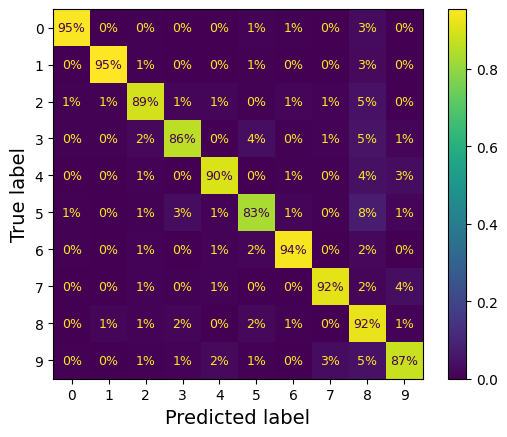

In [72]:
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize='true',values_format='.0%')
plt.show()

[False False False ... False False False]


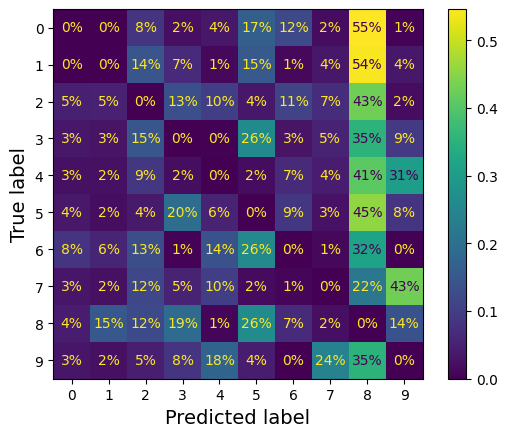

In [73]:
sample_weight = (y_train_pred != y_train)
print(sample_weight)
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
plt.show()

In [74]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

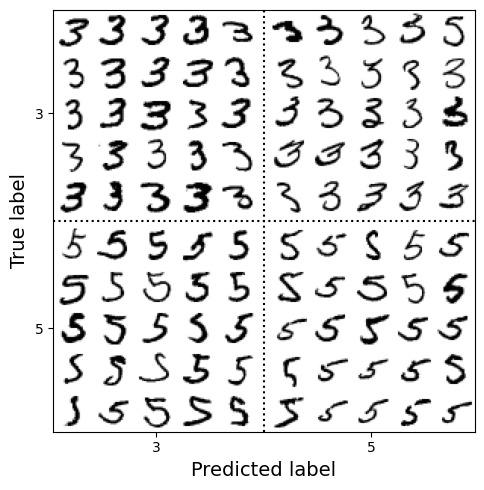

In [75]:
# extra code – this cell generates and saves Figure 3–11
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
save_fig("error_analysis_digits_plot")
plt.show()

# Multilabel Classification

In [76]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large,y_train_odd] # concates columns
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier()

In [77]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [78]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=2,n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9735086054032636

In [79]:
f1_score(y_multilabel,y_train_knn_pred,average='weighted')

0.9751012382425887

In [80]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(),cv=2,random_state=42)
chain_clf.fit(X_train[:2000],y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=2, random_state=42)

In [81]:
np.random.seed(42)  # to make this code example reproducible
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

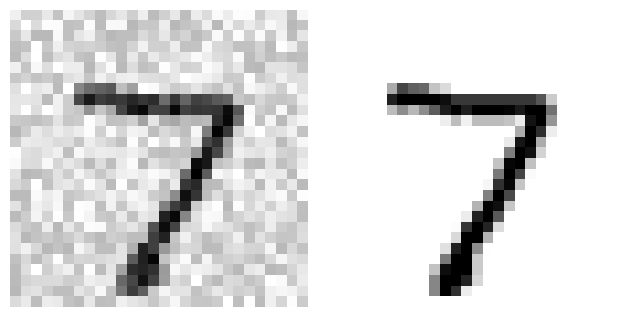

In [82]:
# extra code – this cell generates and saves Figure 3–12
plt.subplot(121); plot_image(X_test_mod[0])
plt.subplot(122); plot_image(y_test_mod[0])
save_fig("noisy_digit_example_plot")
plt.show()

In [83]:
#  Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set.
#  Hint: the KNeighborsClassifier works quite well for this task;
# you just need to find good hyperparameter values
#  (try a grid search on the weights and n_neighbors hyperparameters).

In [86]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
baseline_accuracy_score = knn_clf.score(X_test,y_test)
print(baseline_accuracy_score) # Baseline accuracy score

0.9688


In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = {'weights':['uniform', 'distance'],
              'n_neighbors':[3,4,5,6]}
grid_search = GridSearchCV(knn_clf,
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=3,
                           n_jobs=-1)
grid_search.fit(X_train[:10000],y_train[:10000])

Fitting 2 folds for each of 8 candidates, totalling 16 fits


GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 4, 5, 6],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [89]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 4, 'weights': 'distance'}
0.9331


In [91]:
grid_search.best_estimator_.fit(X_train,y_train)
tuned_accuracy = grid_search.score(X_test,y_test)
tuned_accuracy

0.9714

# Implementing data augmentation

In [92]:
from scipy.ndimage import shift

In [110]:
# shift translates the image accordingly to (x,y)

def shift_image(image,dx,dy):
    image = image.reshape(28,28)
    shifted_image = shift(image,[dx,dy],cval=0,mode='constant')
    return shifted_image.reshape([-1])

In [111]:
print(some_digit.shape)
print(shift_image(some_digit,1,1).shape)

(784,)
(784,)


(784,)


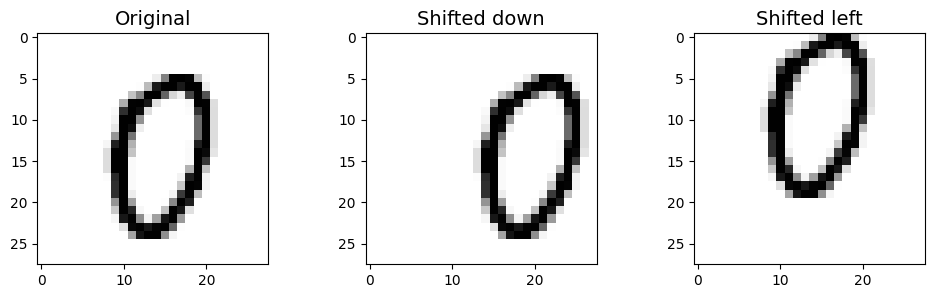

In [116]:
image = X_train[1000]
shifted_image_down = shift_image(image,0,5)
shifted_image_left = shift_image(image,-5,0)
print(image.shape)
# print(image.reshape(28,28))

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title('Original')
plt.imshow(image.reshape(28,28),cmap='Greys',interpolation='nearest')

plt.subplot(132)
plt.title('Shifted down')
plt.imshow(shifted_image_down.reshape(28,28),cmap='Greys',interpolation='nearest')

plt.subplot(133)
plt.title('Shifted left')
plt.imshow(shifted_image_left.reshape(28,28),cmap='Greys',interpolation='nearest')
plt.show()

In [120]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((-1, 0), (1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [121]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [123]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)
knn_clf.fit(X_train_augmented,y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [124]:
augmented_accuracy = knn_clf.score(X_test,y_test)
print(augmented_accuracy)

0.9763


In [125]:
error_rate_change = (1 - augmented_accuracy) / (1 - tuned_accuracy) - 1
print(f"Error rate change: {error_rate_change:.2%}")

Error rate change: -17.13%
